# LADAFON

# Condiciones de la asignación principal

Al operador de telecomunicaciones Ladafon le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### Datos

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/94210e31-fd3d-451b-a350-4a8476756413/final_provider.zip)

Los datos también se encuentran en la plataforma, en la carpeta `/datasets/final_provider/`.

## Etapas del proyecto:

## Hacer un plan de trabajo.

Cuando veas la tarea por primera vez, notarás que está incompleta y que contiene información innecesaria. Haz un análisis exploratorio de datos para averiguar qué preguntas hacer.

In [1]:
#Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
#Importamos los archvos
internet= pd.read_csv('/Users/derek/Chavacodes/TripleTen/internet.csv')

contract= pd.read_csv('/Users/derek/Chavacodes/TripleTen/contract.csv')

personal= pd.read_csv('/Users/derek/Chavacodes/TripleTen/personal.csv')

phone= pd.read_csv('/Users/derek/Chavacodes/TripleTen/phone.csv')

In [3]:
#Mostramos los datos del df internet
print(internet.info())

print(internet.head())

print(internet.isna().sum())

print(internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes 

In [4]:
#Mostramos los datos del df contract
print(contract.info())

print(contract.head())

print(contract.isna().sum())

print(contract.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-

In [5]:
#Mostramos los datos del df personal
print(personal.info())

print(personal.head())

print(personal.isna().sum())

print(personal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min     

In [6]:
#Mostramos los datos del df phone
print(phone.info())

print(phone.head())

print(phone.isna().sum())

print(phone.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
customerID       0
MultipleLines    0
dtype: int64
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


In [7]:
# corregimos los tipos de datos de internet a bool
bool_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[bool_internet] = internet[bool_internet] == 'Yes'

In [8]:
#Comprobamos la correccion
print(internet.info())
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   bool  
 3   OnlineBackup      5517 non-null   bool  
 4   DeviceProtection  5517 non-null   bool  
 5   TechSupport       5517 non-null   bool  
 6   StreamingTV       5517 non-null   bool  
 7   StreamingMovies   5517 non-null   bool  
dtypes: bool(6), object(2)
memory usage: 118.7+ KB
None
   customerID InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0  7590-VHVEG             DSL           False          True             False   
1  5575-GNVDE             DSL            True         False              True   
2  3668-QPYBK             DSL            True          True             False   
3  7795-CFOCW             DSL            True         

In [9]:
#Combinamos los df's
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['PaperlessBilling'] = contract['PaperlessBilling'] == 'Yes'
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [10]:
#Verificamos
print(contract.info())
print(contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   bool          
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: bool(1), datetime64[ns](2), float64(2), object(3)
memory usage: 392.2+ KB
None
   customerID  BeginDate    EndDate            Type  PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              True   
1  5575-GNVDE 2017-04-01        NaT        One year             False   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-mo

In [11]:
#Corregimos el tipo de datos del df personal a bool
bool_personal = ['Partner','Dependents']
personal[bool_personal] = personal[bool_personal] == 'Yes'

In [12]:
#Comprobamos
print(personal.info())
print(personal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   bool  
 4   Dependents     7043 non-null   bool  
dtypes: bool(2), int64(1), object(2)
memory usage: 179.0+ KB
None
   customerID  gender  SeniorCitizen  Partner  Dependents
0  7590-VHVEG  Female              0     True       False
1  5575-GNVDE    Male              0    False       False
2  3668-QPYBK    Male              0    False       False
3  7795-CFOCW    Male              0    False       False
4  9237-HQITU  Female              0    False       False


In [13]:
#Corregimos el tipo de datos de phone
bool_phone = ['MultipleLines']
phone[bool_phone] = phone[bool_phone] == 'Yes'

In [14]:
#verificamos
print(phone.info())
print(phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 56.0+ KB
None
   customerID  MultipleLines
0  5575-GNVDE          False
1  3668-QPYBK          False
2  9237-HQITU          False
3  9305-CDSKC           True
4  1452-KIOVK           True


En esta etapa comenzamos por importar todas las bibliotecas necesarias para realizar exitosamente el proyecto, ademas de los archivos necesarios, en este caso los archivos de internet, contratos, personal y telefono, despues procedemos a explorar cada uno de los dataframes, para conocer su conteido, umero de columnas, tipo de datos, datos ausentes, y de que va cada una de las columnas

Nos pudimos percatar que las columnas 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' de dataframe 'Internet' tenian un tipo de dato object, asi que se cambiaron a bool, ademas de corregir el dataframe contract convirtiendo BeginDate y EndDate a datetime, PaperlessBilling a bool y TotalCharges a float

En el dataframe Personal, las columnas 'Partner','Dependents' fueron convertidas a bool

Por ultimo el dataframe phone se corrigió la columna MultipleLines a tipo bool

In [15]:
# Ver valores ausentes en el DataFrame 'internet'
internet_missing = internet.isnull().sum()
print("Valores ausentes en el DataFrame 'internet':")
print(internet_missing)

# Ver valores ausentes en el DataFrame 'contract'
contract_missing = contract.isnull().sum()
print("\nValores ausentes en el DataFrame 'contract':")
print(contract_missing)

# Ver valores ausentes en el DataFrame 'personal'
personal_missing = personal.isnull().sum()
print("\nValores ausentes en el DataFrame 'personal':")
print(personal_missing)

# Ver valores ausentes en el DataFrame 'phone'
phone_missing = phone.isnull().sum()
print("\nValores ausentes en el DataFrame 'phone':")
print(phone_missing)

Valores ausentes en el DataFrame 'internet':
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Valores ausentes en el DataFrame 'contract':
customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

Valores ausentes en el DataFrame 'personal':
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Valores ausentes en el DataFrame 'phone':
customerID       0
MultipleLines    0
dtype: int64


In [16]:
# Llenar los valores ausentes en la columna "EndDate" con una fecha ficticia (por ejemplo, '9999-12-31')
contract['EndDate'].fillna('9999-12-31', inplace=True)

# Crear la columna "Churn" como un valor booleano basado en la columna "EndDate"
contract['Churn'] = contract['EndDate'].apply(lambda x: False if x == '9999-12-31' else True)

# Imprimir el DataFrame resultante
print(contract)

      customerID  BeginDate              EndDate            Type  \
0     7590-VHVEG 2020-01-01           9999-12-31  Month-to-month   
1     5575-GNVDE 2017-04-01           9999-12-31        One year   
2     3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW 2016-05-01           9999-12-31        One year   
4     9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...        ...                  ...             ...   
7038  6840-RESVB 2018-02-01           9999-12-31        One year   
7039  2234-XADUH 2014-02-01           9999-12-31        One year   
7040  4801-JZAZL 2019-03-01           9999-12-31  Month-to-month   
7041  8361-LTMKD 2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK 2014-08-01           9999-12-31        Two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 True           Electronic check           29.85   
1                False               Mailed c

In [17]:
# Ver valores ausentes en el DataFrame 'contract'
contract_missing = contract.isnull().sum()
print("\nValores ausentes en el DataFrame 'contract':")
print(contract_missing)



Valores ausentes en el DataFrame 'contract':
customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [18]:
total_charges_mean = contract['TotalCharges'].mean()

# Llenar los valores ausentes en la columna 'TotalCharges' con el promedio
contract['TotalCharges'].fillna(total_charges_mean, inplace=True)

# Imprimir el DataFrame resultante
print(contract)

      customerID  BeginDate              EndDate            Type  \
0     7590-VHVEG 2020-01-01           9999-12-31  Month-to-month   
1     5575-GNVDE 2017-04-01           9999-12-31        One year   
2     3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW 2016-05-01           9999-12-31        One year   
4     9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...        ...                  ...             ...   
7038  6840-RESVB 2018-02-01           9999-12-31        One year   
7039  2234-XADUH 2014-02-01           9999-12-31        One year   
7040  4801-JZAZL 2019-03-01           9999-12-31  Month-to-month   
7041  8361-LTMKD 2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK 2014-08-01           9999-12-31        Two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 True           Electronic check           29.85   
1                False               Mailed c

In [19]:
contract_missing = contract.isnull().sum()
print("\nValores ausentes en el DataFrame 'contract':")
print(contract_missing)



Valores ausentes en el DataFrame 'contract':
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Investigar la tarea.

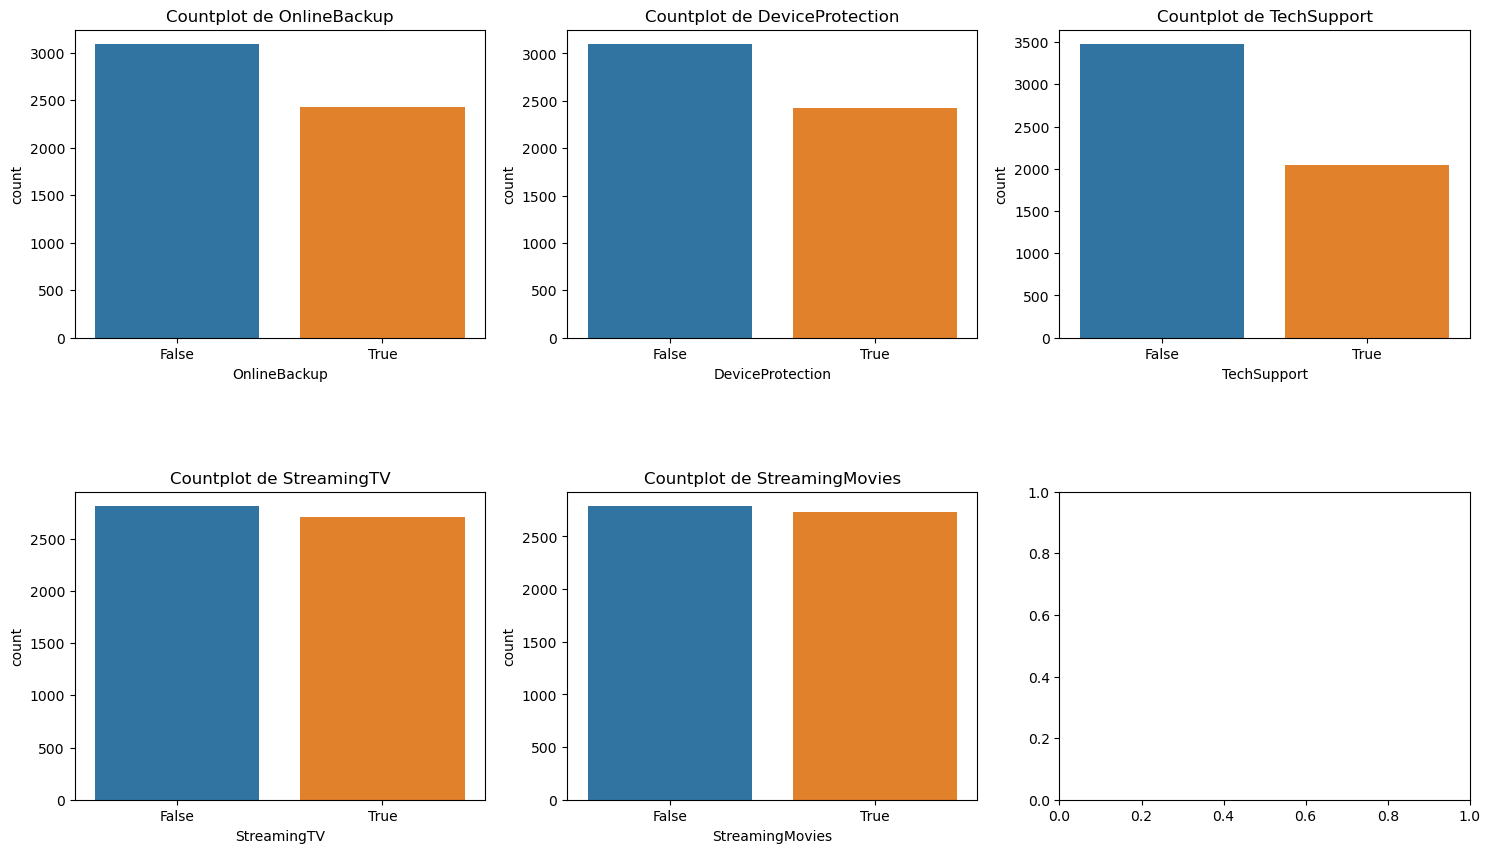

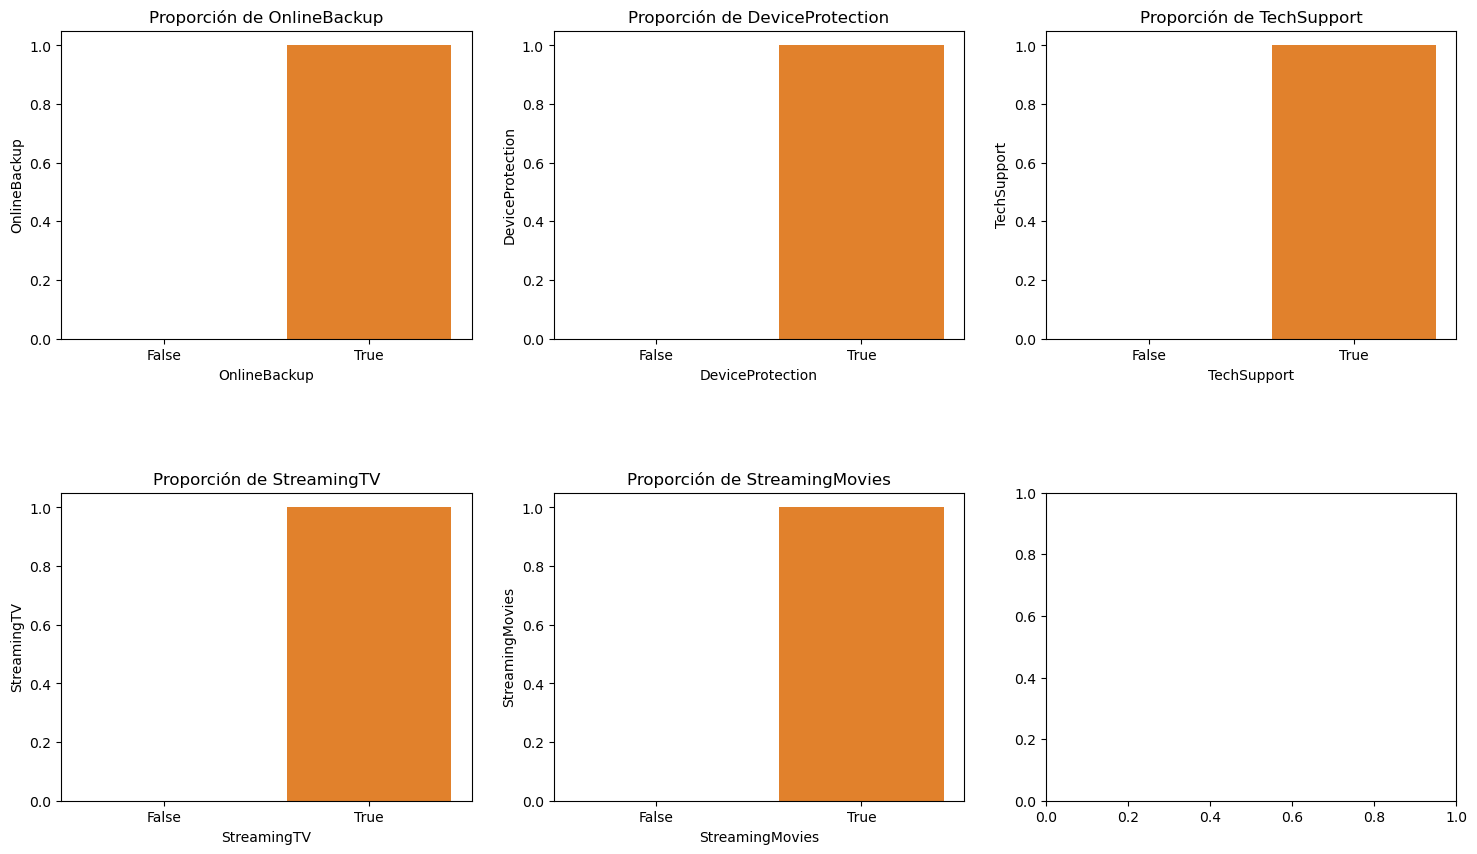

In [20]:
internet_subset = internet.drop(columns=['customerID'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(internet_subset.columns[2:]):
    sns.countplot(data=internet_subset, x=column, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Countplot de {column}')

fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig2.subplots_adjust(hspace=0.5)

for i, column in enumerate(internet_subset.columns[2:]):
    sns.barplot(data=internet_subset, x=column, y=column, ax=axes2[i // 3, i % 3])
    axes2[i // 3, i % 3].set_title(f'Proporción de {column}')

plt.show()

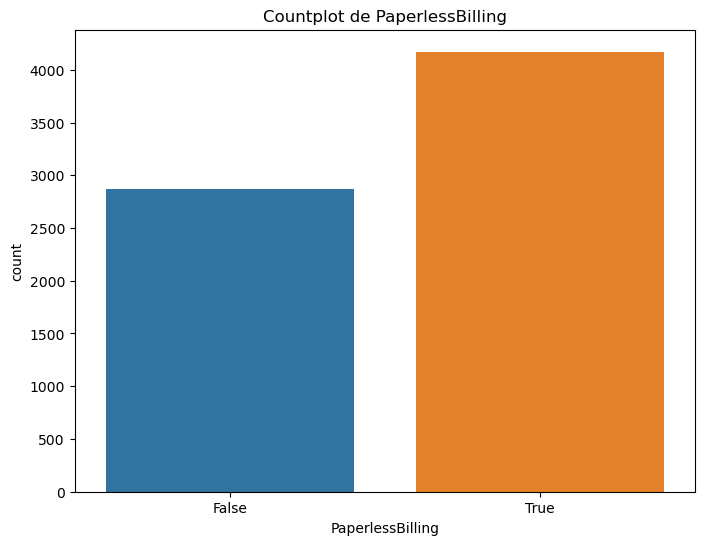

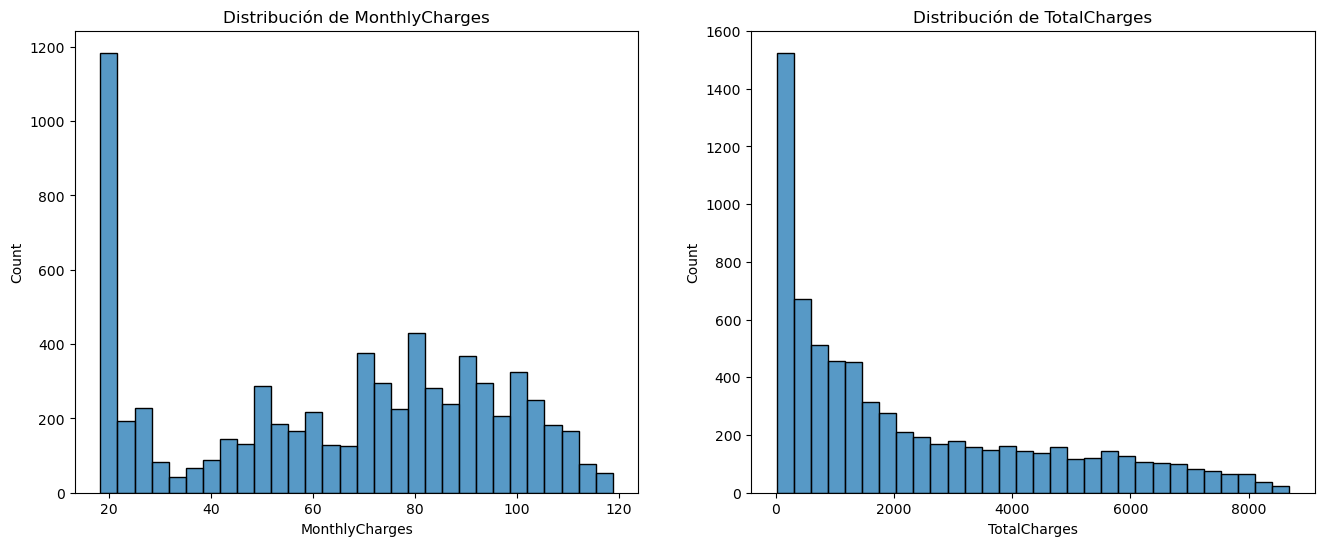

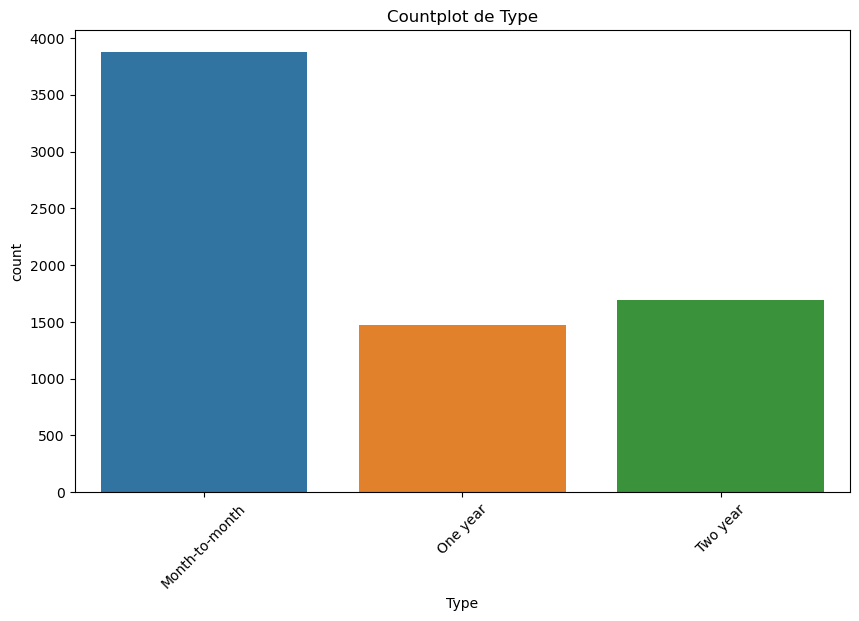

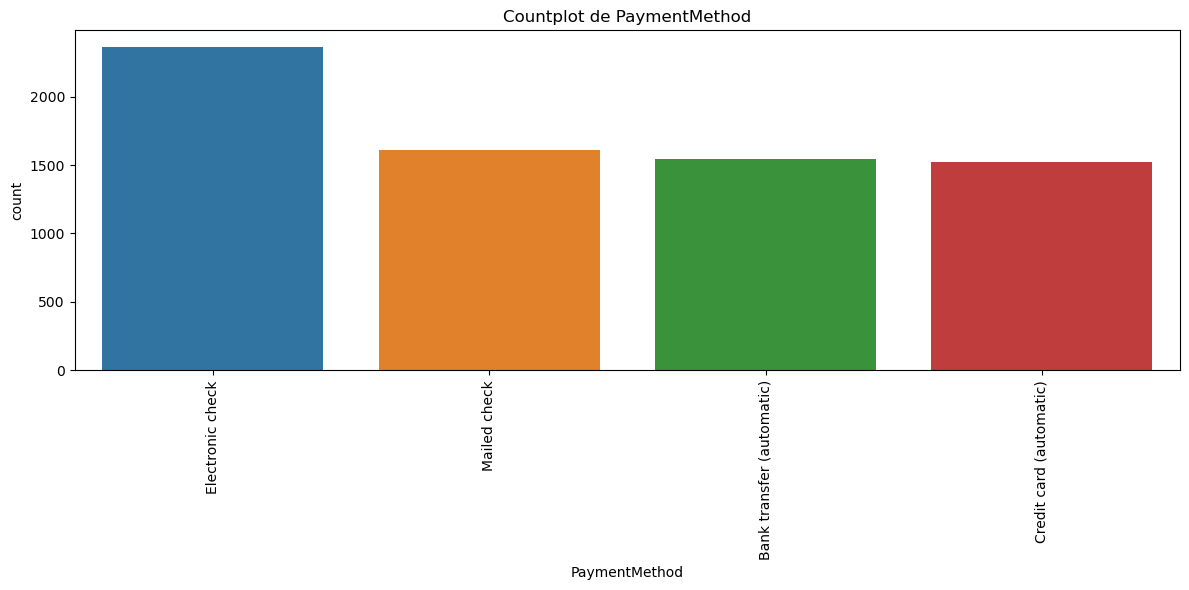

In [21]:
contract_subset = contract.drop(columns=['customerID', 'BeginDate', 'EndDate'])

plt.figure(figsize=(8, 6))
sns.countplot(data=contract, x='PaperlessBilling')
plt.title('Countplot de PaperlessBilling')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(data=contract, x='MonthlyCharges', ax=axes[0], bins=30)
sns.histplot(data=contract, x='TotalCharges', ax=axes[1], bins=30)
axes[0].set_title('Distribución de MonthlyCharges')
axes[1].set_title('Distribución de TotalCharges')

plt.figure(figsize=(10, 6))
sns.countplot(data=contract, x='Type')
plt.xticks(rotation=45)
plt.title('Countplot de Type')

plt.figure(figsize=(12, 6))
sns.countplot(data=contract, x='PaymentMethod')
plt.xticks(rotation=90)
plt.title('Countplot de PaymentMethod')

plt.tight_layout()
plt.show()

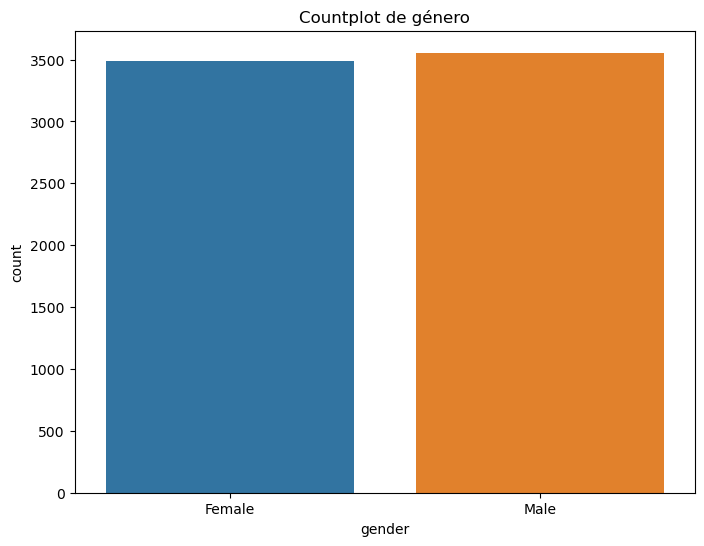

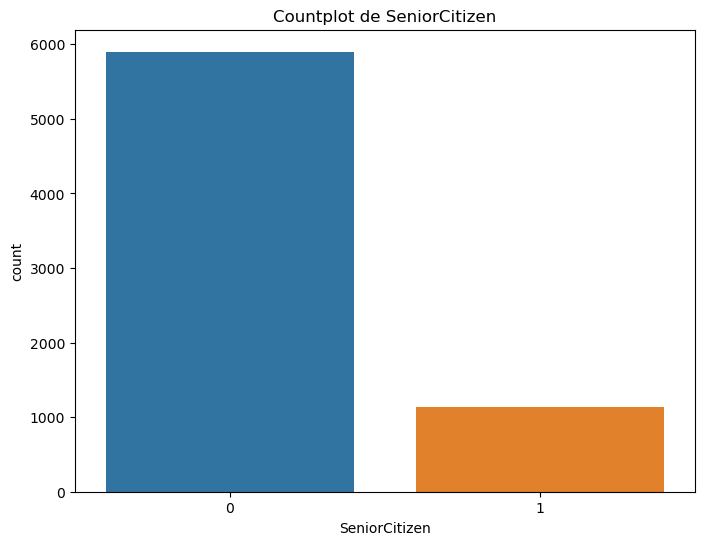

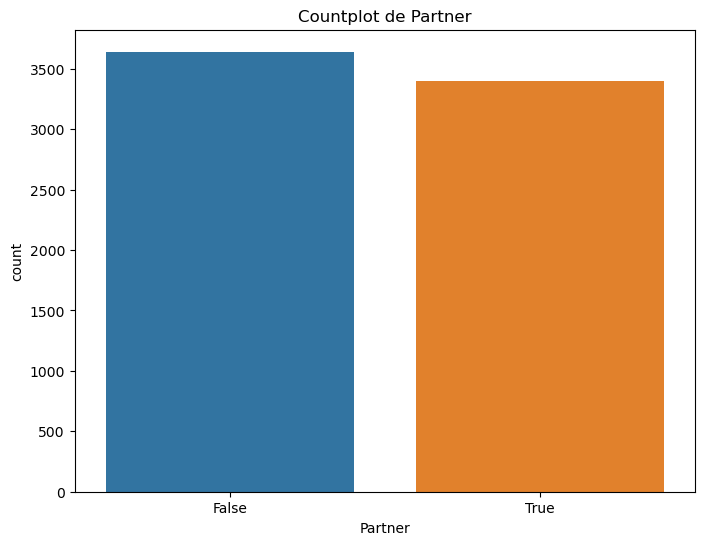

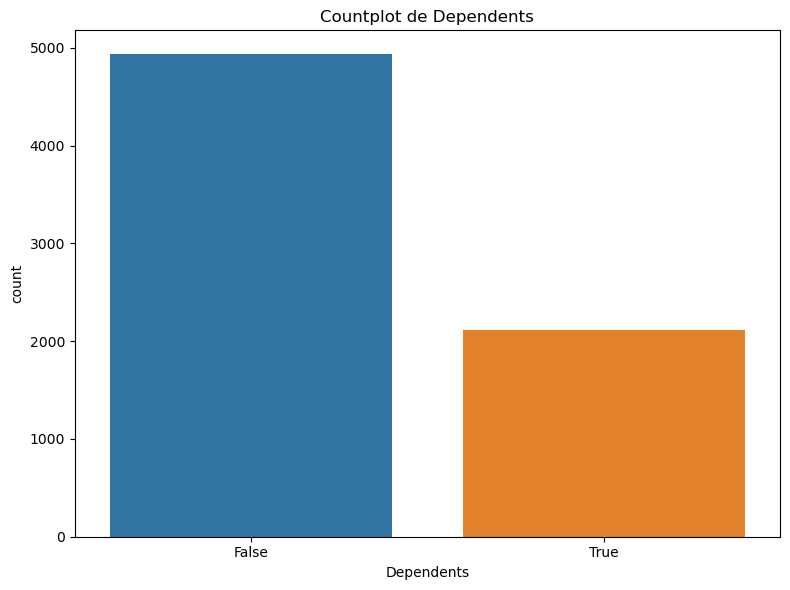

In [22]:
personal_subset = personal.drop(columns=['customerID'])

plt.figure(figsize=(8, 6))
sns.countplot(data=personal, x='gender')
plt.title('Countplot de género')

plt.figure(figsize=(8, 6))
sns.countplot(data=personal, x='SeniorCitizen')
plt.title('Countplot de SeniorCitizen')

plt.figure(figsize=(8, 6))
sns.countplot(data=personal, x='Partner')
plt.title('Countplot de Partner')

plt.figure(figsize=(8, 6))
sns.countplot(data=personal, x='Dependents')
plt.title('Countplot de Dependents')

plt.tight_layout()
plt.show()

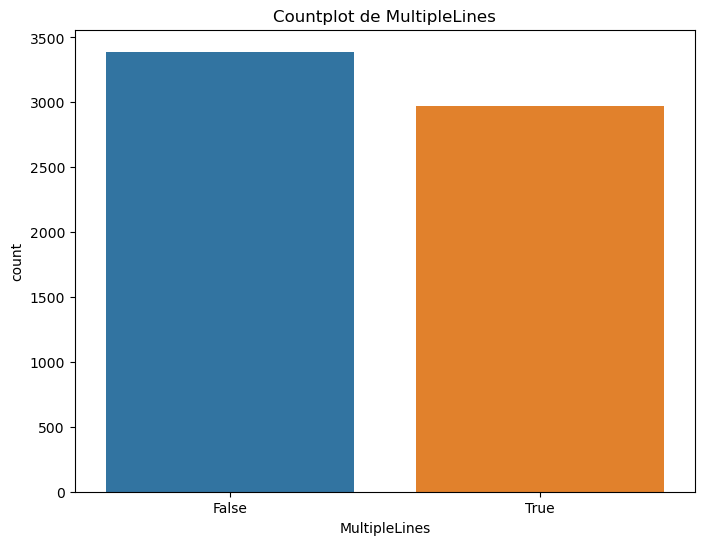

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=phone, x='MultipleLines')
plt.title('Countplot de MultipleLines')

plt.show()

En esta seccion podemos visualizar los datos en forma de graficas para darnos una idea de lo que contienen los data frames

Podemos ver que el dataframe de *Internet*
3,000 no tienen OnlineBackup y 2,500 si
Un poco mas de 3,000 no tienen DeviceProtection y un poco menos de 2,500 si
3,500 no tienen TechSupport y solo 2,000 lo tiene
Mientras que para StreamingTV y StreamingMovies tenemos resultados similares, sin embargo ambos se inclinan un poco mas hacia False


Para el dataframe *Contract* vemos que la mayoria opta por PaperlessBilling con una diferencia de un poco mas de 1,000, ademas la principal distribucion de Monthly Charges se concentra en 20, y en TotalCharges encontramos que se acumulan mas del puto 0 al 200
, la mayoria de clientes (50% aproximadamente) prefieren utilizar membresias MonthToMonth, seguido de TwoYear y un poco menos OneYear.
El tipo de pago preferido es Electronic Check con mas de 2000, mientras que Mailed Check, Bank Transfer y Credit Card se encuentran por encima de los 1500

En el dataframe *Personal* vemos que apenas hay una diferencia de genero, es ligeramente mas grande el grupo Male, el tipo 0 de SeniorCitizen es de casi 6,000 mientras que el tipo 1 es de un poco mas de 1,000
El countplot de partner nos muestra que hay ligeramente mas personas que nos son Partners, con un poco mas de 3,500 y las que si son Partner es un poco mas abajo de 3,500
Mientras que en el dependents cerca de 5,000 no son dependents y solo un poco mas arriba del 2,000 lo son

En el dataframe *Phone* vemos que para MultipleLines casi 3,500 no lo tiene y cerca de 3,000 si

## Desarrollar un modelo.

In [24]:
# Combinar los DataFrames en uno solo
merged_data = pd.merge(internet, contract, on='customerID', how='inner')
merged_data = pd.merge(merged_data, personal, on='customerID', how='inner')
merged_data = pd.merge(merged_data, phone, on='customerID', how='inner')

In [25]:
features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Type', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines']

X = merged_data[features]
y = merged_data['Churn']

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, columns=['InternetService', 'Type', 'gender'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo: {:.2f}".format(accuracy))
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.75
              precision    recall  f1-score   support

       False       0.80      0.83      0.81       641
        True       0.64      0.60      0.62       326

    accuracy                           0.75       967
   macro avg       0.72      0.71      0.72       967
weighted avg       0.75      0.75      0.75       967



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [27]:
# Modelo 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Modelo 2: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Modelo 3: Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Modelo 4: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [28]:
models = [rf_model, gb_model, svm_model, lr_model]
results = []

for model in models:
    y_pred = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
    auc_roc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))  # Usamos un umbral de 0.5 para clasificar

    results.append({
        'Model': model.__class__.__name__,
        'AUC-ROC': auc_roc,
        'Accuracy': accuracy
    })

# Imprime los resultados
for result in results:
    print(f"{result['Model']}: AUC-ROC={result['AUC-ROC']:.2f}, Accuracy={result['Accuracy']:.2f}")


RandomForestClassifier: AUC-ROC=0.77, Accuracy=0.74
GradientBoostingClassifier: AUC-ROC=0.81, Accuracy=0.76
SVC: AUC-ROC=0.69, Accuracy=0.72
LogisticRegression: AUC-ROC=0.81, Accuracy=0.75


Combinamos los dataframes mediante la columna costumerID

Despues seleccionamos los features relevantes para nuestro analisis

Codificamos las variables categoricas mediante one-hot

Dividimos los datos en conjunos de entrenamiento y prueba

Creamos distintos modelos

Evaluamos la exactitud